## Assignment 4

Using data from this FiveThirtyEight post, write code to calculate the correlation of the responses from the poll.
Respond to the story in your PR. Is this a good example of data journalism? Why or why not?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import statsmodels.formula.api as smf

df = pd.read_excel('Untitled spreadsheet.xlsx')

In [32]:
df.columns ='Demographic', 'Approve_of_Obama', 'Favor_Iran_Deal'
df.head(3)

,Demographic,Approve_of_Obama,Favor_Iran_Deal
0,Total,44,47
1,Dem,78,60
2,Rep,10,34


In [33]:
df.corr()['Favor_Iran_Deal'].sort_values(ascending=False)

Favor_Iran_Deal     1.000000
Approve_of_Obama    0.913536
Name: Favor_Iran_Deal, dtype: float64

In [34]:
lm = smf.ols(formula="Favor_Iran_Deal~Approve_of_Obama",data=df).fit()
lm.params

Intercept           30.573912
Approve_of_Obama     0.355564
dtype: float64

In [35]:
intercept, slope = lm.params

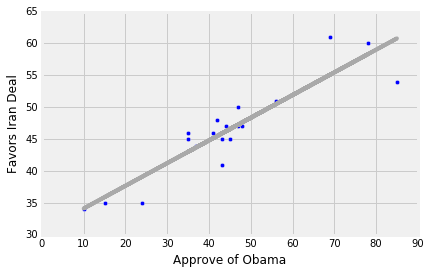

In [37]:
df.plot(kind="scatter",x="Approve_of_Obama",y="Favor_Iran_Deal")
plt.plot(df["Approve_of_Obama"],slope*df["Approve_of_Obama"]+intercept,"-",color="darkgrey") 

plt.xlabel('Approve of Obama')
plt.ylabel('Favors Iran Deal')